# Inaugural Project

Imports and set magics:

In [31]:
import numpy as np
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import packages for plots etc. 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import ipywidgets as widgets # For interactive plots/buttons

# Import your own code
import inauguralproject 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The model is specified in the class "HouseholdSpecializationModelClass", which contains all model equations and methods used for solving the different questions in the assignment. 

We create an instance of the class:

In [32]:
model = inauguralproject.HouseholdSpecializationModelClass()

In order to illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$, we solve the model discretely for different combinations of the parameters $\alpha$ and $\sigma$ and assign the outputs to a matrix presenting the results.

**Procedure**
1. We construct lists of the required parameter values of $\alpha$ and $\sigma$

2. We construct a nested loop that solves the model discretely for each combination of $\alpha$ and $\sigma$ and returns the ratio $\frac{H_F}{H_M}$

3. We assign the solutions to a dataframe displaying the ratio betweeen $H_F$ and $H_M$ for all relevant values of $\sigma$ and $\alpha$

In [33]:
# Create list with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

# Construct table
df = pd.DataFrame(columns = pd.Index(alpha_list, name="sigma/alpha"), index = pd.Index(sigma_list, name=""))

# Solve model for different parameter values and add results to table
for i in alpha_list:
    for j in sigma_list:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

# Print table
print(df)



/Users/nikolinemadsen/Documents/Polit/6.Semester/IntroProg/projects-2023-alt-andet-end-lige/inauguralproject/inauguralproject.py:83: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
/Users/nikolinemadsen/Documents/Polit/6.Semester/IntroProg/projects-2023-alt-andet-end-lige/inauguralproject/inauguralproject.py:83: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
/Users/nikolinemadsen/Documents/Polit/6.Semester/IntroProg/projects-2023-alt-andet-end-lige/inauguralproject/inauguralproject.py:88: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


sigma/alpha  0.25  0.50  0.75
                             
0.5          0.55  1.00  1.83
1.0          0.31  1.00  3.25
1.5          0.21  1.00  4.67


From this matrix we observe that as $\alpha$ increases for a fixed $\sigma$, then $\frac{H_F}{H_M}$ increases as well. The interpretation is that when $\alpha$ increases females become more productive in home production relative to males, thus a higher $\alpha$ implies that the $\frac{H_F}{H_M}$ is higher in the household's optimal allocation. 

Moreover, $\sigma$ is the elasticity of substitution for consumption of home production. Here, we see that if $\sigma=0.5$ 

# Question 2

Explain your code and procedure

/Users/nikolinemadsen/Documents/Polit/6.Semester/IntroProg/projects-2023-alt-andet-end-lige/inauguralproject/inauguralproject.py:88: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


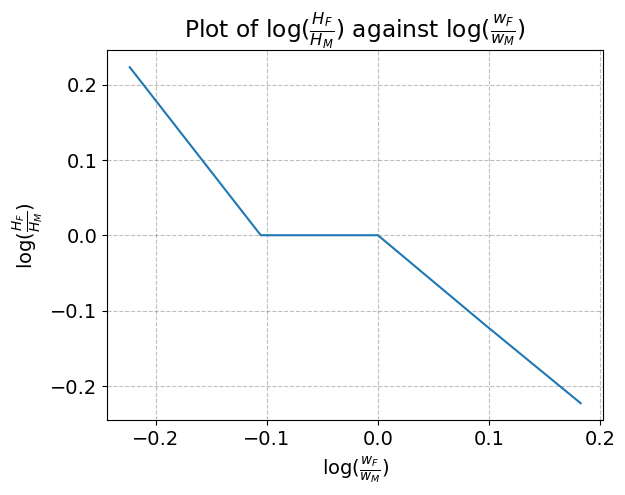

In [34]:
# reset alpha and sigma to baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

#Create empty lists
logHF_HM = np.zeros(5)
logwF_wM = np.zeros(5)

#solve model discretely
model.solve_wF_vec(discrete=True)

# create relevant variables
for i in range(5):
    logHF_HM[i] = np.log(model.sol.HF_vec[i]/ model.sol.HM_vec[i])
    logwF_wM[i] = np.log(model.par.wF_vec[i])

# create the figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(logwF_wM,logHF_HM)

ax.set_title("Plot of " + r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$')
ax.set_xlabel(r'$\log(\frac{w_F}{w_M})$')
ax.set_ylabel(r'$\log(\frac{H_F}{H_M})$');

plt.show()


The figure shows that a negative relationship for between $log\frac{H_F}{H_M}$ and $log\frac{W_F}{W_M}$. That is as $log\frac{W_F}{W_M}$ increases, implying that the woman earns more, then the $log\frac{H_F}{H_M}$ decreases. A decrease in $log\frac{H_F}{H_M}$ implies...

# Question 3

Explain your code and procedure

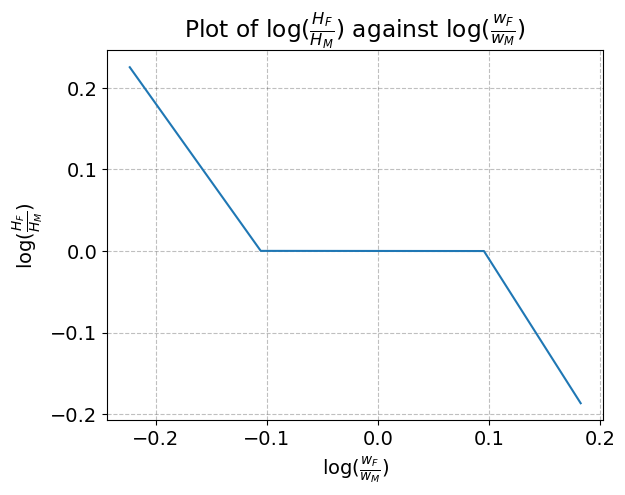

In [35]:
#solve model continously
model.solve_wF_vec(discrete=False)

#create relevant variables
for i in range(5):
    logHF_HM[i] = np.log(model.sol.HF_vec[i]/ model.sol.HM_vec[i])
    logwF_wM[i] = np.log(model.par.wF_vec[i])

# create the figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(logwF_wM,logHF_HM)

ax.set_title("Plot of " + r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$')
ax.set_xlabel(r'$\log(\frac{w_F}{w_M})$')
ax.set_ylabel(r'$\log(\frac{H_F}{H_M})$');

plt.show()


# Question 4

In [36]:
from scipy import optimize

def objective_func(par): 
    alpha, sigma = par
    model = inauguralproject.HouseholdSpecializationModelClass()
    model.par.alpha = alpha
    model.par.sigma = sigma
    beta0_true = 0.4
    beta1_true = -0.1

    for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_continous()
        model.sol.HF_vec[i] = results.HF
        model.sol.HM_vec[i] = results.HM

    model.run_regression()
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    return ((beta0_true - beta0)**2 + (beta1_true - beta1)**2)


par_guess = [0.5,1.0]
bounds = ((0,1),(0,4))

result = optimize.minimize(objective_func, par_guess,bounds=bounds, method = "Nelder-Mead")
x = (result.x[0],result.x[1])
print(f'Optimal values are alpha={result.x[0]:.3f} and sigma={result.x[1]:.3f}')
print(f'The squared deviation from data moments is in this case: {objective_func(x)}')


/Users/nikolinemadsen/Documents/Polit/6.Semester/IntroProg/projects-2023-alt-andet-end-lige/inauguralproject/inauguralproject.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
/Users/nikolinemadsen/Documents/Polit/6.Semester/IntroProg/projects-2023-alt-andet-end-lige/inauguralproject/inauguralproject.py:83: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))


Optimal values are alpha=0.988 and sigma=0.091
The squared deviation from data moments is in this case: 1.2242221758960564e-09


In [178]:
from scipy import optimize

def objective_func(par): 
    alpha, sigma = par
    model = inauguralproject.HouseholdSpecializationModelClass()
    model.par.alpha = alpha
    model.par.sigma = sigma
    beta0_true = 0.4
    beta1_true = -0.1

    model.solve_wF_vec(discrete=False) #Solve model discretely

    model.run_regression() #Run linear regression
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    return ((beta0_true - beta0)**2 + (beta1_true - beta1)**2)


par_guess = [0.5,1.0] #Initial guess for alpha and sigma
bounds = ((0,1),(0,4)) # Constructing bounds for alpha and sigma

result = optimize.minimize(objective_func, par_guess,bounds=bounds, method = "Nelder-Mead")
x = (result.x[0],result.x[1])
print(f'Optimal values are alpha={result.x[0]:.3f} and sigma={result.x[1]:.3f}')
print(f'The squared deviation from data moments is in this case: {objective_func(x)}')


c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:83: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))


Optimal values are alpha=0.988 and sigma=0.091
The squared deviation from data moments is in this case: 1.2269493292158662e-09


In [40]:
alphas = np.linspace(0.90,0.99,20)
sigmas = np.linspace(0.05,0.1,20)

func_vec = [] 
# Using a nested Loop over alpha and sigma values 
for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        model = inauguralproject.HouseholdSpecializationModelClass() #Creating an instance
        model.par.alpha = alpha
        model.par.sigma = sigma 
        model.solve_wF_vec() #Calling female wage solver
        model.run_regression() #Calling regression
        func_value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)
        if func_value > 0:
            func_vec.append(func_value)

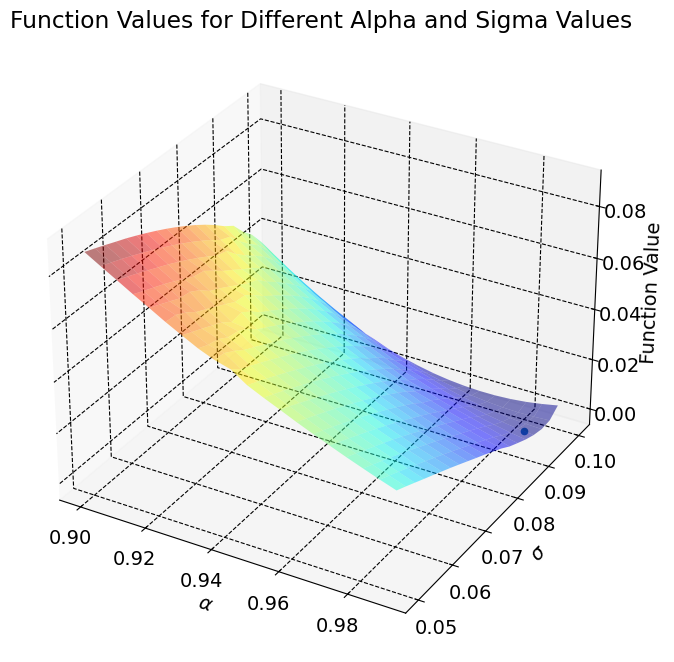

In [43]:
func_vals = np.array(func_vec).reshape(len(alphas), len(sigmas)) #Making length of the alpha and sigma vector the same as func_vec
# Create grid of alpha and sigma values 
alpha_grid, sigma_grid = np.meshgrid(alphas, sigmas)
# Create 3D plot
fig = plt.figure(figsize=(10,8)) #Initiating figure
ax = plt.axes(projection='3d') #Making the plot 3d
ax.plot_surface(alpha_grid, sigma_grid, func_vals, cmap='jet', alpha = 0.50) #Creating figure
ax.scatter([0.988], [0.091], [(0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2]) #Plotting optimal solution
ax.set_xlabel(r'$\alpha$') # X-label
ax.set_ylabel(r'$\sigma$') # Y-label
ax.set_zlabel('Function Value') #Z-label
ax.set_title('Function Values for Different Alpha and Sigma Values') #Title
plt.show() 

ADD CONCISE CONLUSION.